In [6]:
import rawgpy
import time
import json
import urllib.request
from nt import listdir
import os
import re
from os import path
import pandas as pd
import numpy as np
import nltk
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


pd.set_option('display.max_colwidth', 300)
meta = pd.read_csv("games3.csv", sep = ',' , header = None)

meta.columns = ["id","name","description","genres"]
meta.head()

,id,name,description,genres
0,id,name,descr,genres
1,28310,0 day Attack on Earth,seven days that will determine the fate of humanity now begin high tech tokyo is in rubble the once vibrant new york ground to a halt and the city of lights paris enveloped by darkness and despair join mankind s struggle against massive invaders as they converge on the world s major cities in ba...,['Shooter']
2,10235,0 Day,freedom of movement with flight touch pad and teleportation move through the city hunting down your enemies with a growing assortment of weapons from home made spears to assault rifles sneak up on armed targets to catch them off guard or maneuver at full speed around bullets and bat their head o...,"['Action', 'Adventure', 'Strategy', 'Indie']"
3,386925,0 Hour Meltdown,built for the hour game jam your power plant is in meltdown turn everything off to try to stop the meltdown timer,['Puzzle']
4,381643,0 Lives left,how do you play a game with lives left no controls no cloths and no tutorial,['Platformer']


In [7]:
games = pd.DataFrame(meta)
games.head()

,id,name,description,genres
0,id,name,descr,genres
1,28310,0 day Attack on Earth,seven days that will determine the fate of humanity now begin high tech tokyo is in rubble the once vibrant new york ground to a halt and the city of lights paris enveloped by darkness and despair join mankind s struggle against massive invaders as they converge on the world s major cities in ba...,['Shooter']
2,10235,0 Day,freedom of movement with flight touch pad and teleportation move through the city hunting down your enemies with a growing assortment of weapons from home made spears to assault rifles sneak up on armed targets to catch them off guard or maneuver at full speed around bullets and bat their head o...,"['Action', 'Adventure', 'Strategy', 'Indie']"
3,386925,0 Hour Meltdown,built for the hour game jam your power plant is in meltdown turn everything off to try to stop the meltdown timer,['Puzzle']
4,381643,0 Lives left,how do you play a game with lives left no controls no cloths and no tutorial,['Platformer']


In [8]:
genres = [] 
genres1 = [] 
s1= ['']
# extract genres
for i in games['genres']: 
    a = list(i.replace("]",'').replace('[','').replace("'",'').replace(' ','').split(","))
    if a == s1:
        genres.append(' ') 
    else:
        genres.append(a)
        genres1.append(a)

# add to 'movies' dataframe  
games['genre_new'] = genres
games.shape

(3502, 5)

In [9]:
games_new =  games[~(games['genre_new'] == ' ')]
games_new.head()

,id,name,description,genres,genre_new
0,id,name,descr,genres,[genres]
1,28310,0 day Attack on Earth,seven days that will determine the fate of humanity now begin high tech tokyo is in rubble the once vibrant new york ground to a halt and the city of lights paris enveloped by darkness and despair join mankind s struggle against massive invaders as they converge on the world s major cities in ba...,['Shooter'],[Shooter]
2,10235,0 Day,freedom of movement with flight touch pad and teleportation move through the city hunting down your enemies with a growing assortment of weapons from home made spears to assault rifles sneak up on armed targets to catch them off guard or maneuver at full speed around bullets and bat their head o...,"['Action', 'Adventure', 'Strategy', 'Indie']","[Action, Adventure, Strategy, Indie]"
3,386925,0 Hour Meltdown,built for the hour game jam your power plant is in meltdown turn everything off to try to stop the meltdown timer,['Puzzle'],[Puzzle]
4,381643,0 Lives left,how do you play a game with lives left no controls no cloths and no tutorial,['Platformer'],[Platformer]


In [10]:
games_new.shape, games.shape

((2914, 5), (3502, 5))

In [11]:
all_genres = sum(genres1,[])


print(len(set(all_genres)))

20


In [12]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

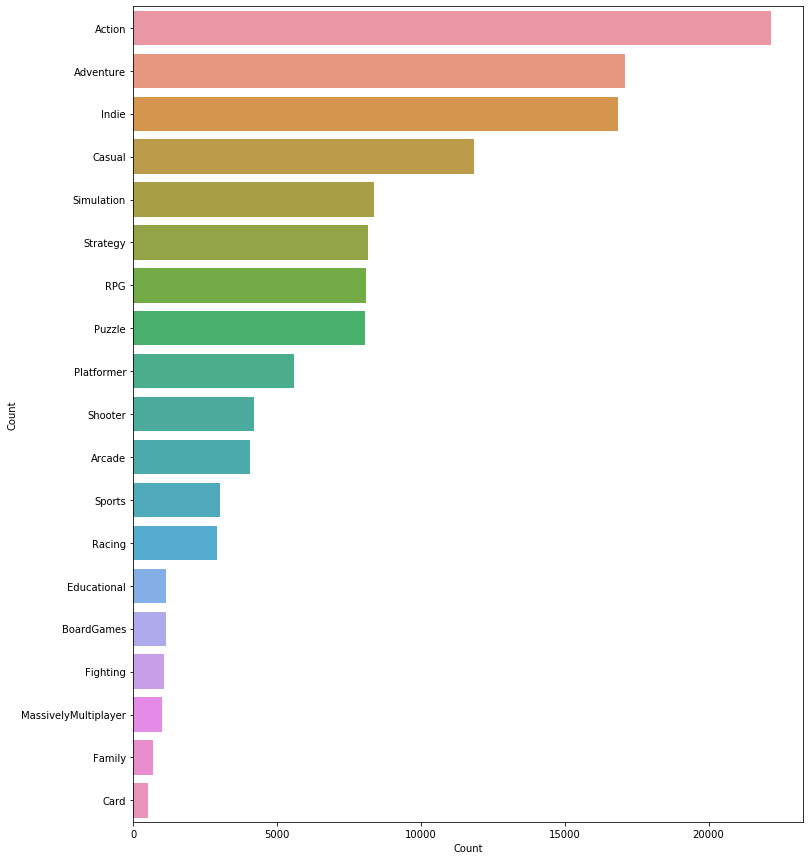

In [37]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()